# Case Cumbuca

## Importing `Libs`

In [9]:

from resources.dna import DNA
from resources.momentos import *
from resources.flights import *
import nycflights13
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import folium

### *1 Transcrição DNA → RNA*

In [10]:
# Seq de Dna que vai ser transcrita
dna_seq = 'ACTGATA'
dna = DNA(dna_seq)

## Caso deseje alterar a corresp dos pares por algum motivo segue a estrutura de uso.
# pares_correspondentes = {
#     'A': 'T',
#     'C': 'G',
#     'G': 'C',
#     'T': 'A'
# }
# dna = DNA(dna_seq, par_corresp=pares_correspondentes)

rna_seq = dna.transcription()
print(f'\nA transcrição da sequência de DNA {dna_seq} em RNA é: {rna_seq}')


A transcrição da sequência de DNA ACTGATA em RNA é: UGACUAU


### *2 Momentos Estatísticos*

In [11]:
amostra = gerar_amostra(1000, 0, 100)
momento_01 = momento(amostra, 2, central=True)
print('\n')
print(f'k-ésimo momento central: {momento_01}')



k-ésimo momento central: 837.19


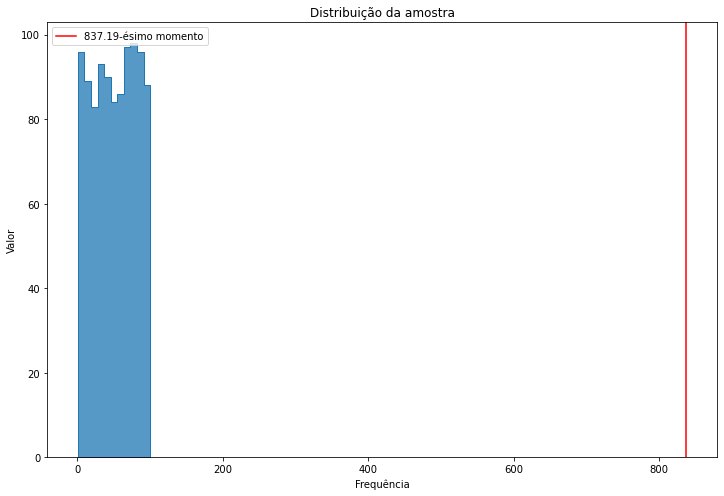

Quando lidamos com dados não normalizados achei bem estranha essa variância


In [12]:
plot = plot_moment(amostra, momento_01)

print('Quando lidamos com dados não normalizados achei bem estranha essa variância')

In [13]:
amostra_normlziada = gerar_amostra_normalizada(1000, 0, 100)
momento_02 = momento(amostra_normlziada, 2, central=True)
print('\n')
print(f'k-ésimo momento central: {momento_02}')



k-ésimo momento central: 0.08


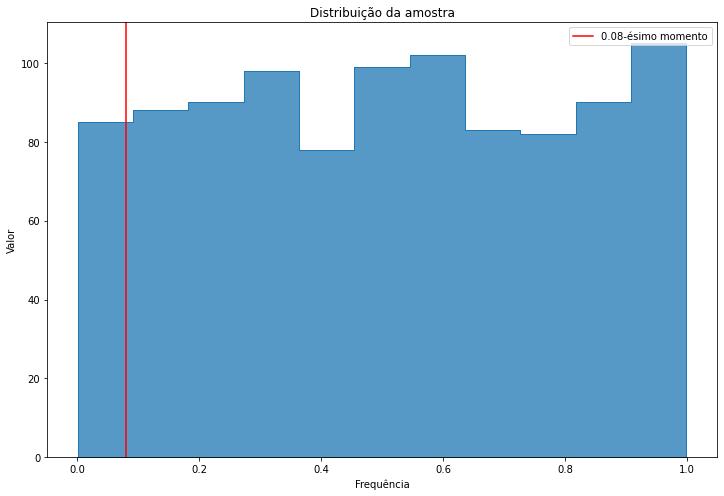

In [14]:
plot = plot_moment(amostra_normlziada,momento_02)

### *3 Processando e explorando dados em um banco relacional*

Pré analise

In [15]:
# Colunas e seus types
flights = nycflights13.flights
df_flights = pd.DataFrame(flights)
print(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [16]:
# verificar quantidade de valores nulos em cada coluna
print(df_flights.isna().sum())

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64


In [17]:
# Número total de nulos | porcentagem do total.
print('\n')
print(df_flights.isna().sum().sum(), str(round(porcentagem_de_valores_nulos(df_flights),2))+'%')



46595 0.73%


In [18]:
# Porcentagem de nulos nas colunas com maior número de nulos.

colunas_com_nulos = df_flights.columns[df_flights.isnull().any()]
porcentagem_nulos = [porcentagem_de_valores_nulos(df_flights, col) for col in colunas_com_nulos]

for col, pct in zip(colunas_com_nulos, porcentagem_nulos):
    print(f"A coluna {col} tem {pct:.2f}% de valores nulos.")

A coluna dep_time tem 2.45% de valores nulos.
A coluna dep_delay tem 2.45% de valores nulos.
A coluna arr_time tem 2.59% de valores nulos.
A coluna arr_delay tem 2.80% de valores nulos.
A coluna tailnum tem 0.75% de valores nulos.
A coluna air_time tem 2.80% de valores nulos.


### Com base nas informações acima e na falta de evidências sobre se os valores nulos na coluna de atrasos 
### eram intencionais ou não, e devido à sua baixa representatividade, decidi remover os dados nulos da análise.

In [19]:
df_flights_limpo = df_flights.dropna()
print('\n')
print( "A quantidade de dados removidos foram:",len(df_flights)-len(df_flights_limpo))



A quantidade de dados removidos foram: 9430


In [20]:
df_flights_limpo = df_flights.dropna()
print('\n')
print(len(df_flights_limpo))



327346


`3.1  - Compute a média móvel 30 dias e o desvio-padrão móvel, também na janela de 30 dias, dos atrasos. Gere uma visualização com as duas séries temporais.`

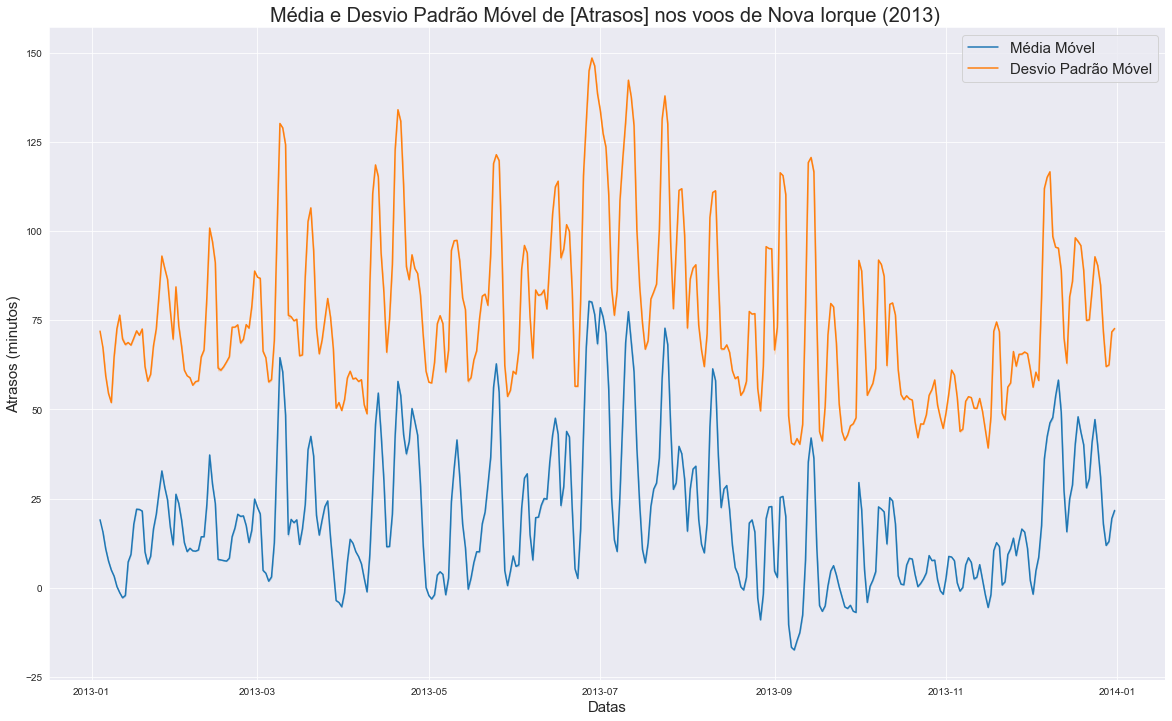

In [21]:
flights = df_flights_limpo.copy()

# Convertendo a coluna de datas para datetime
flights['date'] = pd.to_datetime(flights[['year', 'month', 'day']])

# Calculando atrasos em minutos
flights['delay'] = flights['arr_delay'] + flights['dep_delay']

 #Calculando a média móvel e o desvio-padrão móvel de atrasos
flights['media_movel'] = flights['delay'].rolling(window=3000).mean() # aqui nao era pra ser avg?
flights['std_movel'] = flights['delay'].rolling(window=3000).std()


# Plotando as séries temporais utilizando seaborn.
sns.set_style("darkgrid")
plt.figure(figsize=(20, 12))
sns.lineplot(data=flights, x='date', y='media_movel', label='Média Móvel')
sns.lineplot(data=flights, x='date', y='std_movel', label='Desvio Padrão Móvel')
plt.title('Média e Desvio Padrão Móvel de [Atrasos] nos voos de Nova Iorque (2013) ', fontsize=20)
plt.xlabel('Datas', fontsize=15)
plt.ylabel('Atrasos (minutos)', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


`3.2 - Encontre a porcentagem de voos que atrasam mais de 5 minutos por empresa aérea, por mês. Qual foi o pior mês do ano para a Delta Airlines?`

In [22]:
# Carregando dados e vendo sua disposição.
airlines = nycflights13.airlines
df_airlines = pd.DataFrame(airlines)
print(df_airlines.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   carrier  16 non-null     object
 1   name     16 non-null     object
dtypes: object(2)
memory usage: 384.0+ bytes
None


In [23]:
# Encontrando o carrier de nosso querido Delta Airlines
df_airlines.head(16)

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


In [24]:
# Pegando o valor de Delta Airflines para filtrar.
var_delta = df_airlines.query('name == "Delta Air Lines Inc."')['carrier'].values[0]

# Novo df para questão.
df_empresas_delay = df_flights_limpo.copy()

# Calculando atrasos em minutos
df_empresas_delay['delay'] = df_empresas_delay['arr_delay'] + df_empresas_delay['dep_delay']
minutos = 5
df_empreas_atrasadas = df_empresas_delay.query('delay > @minutos')

# Calculando o número total de voos por companhia aérea e por mês
total_voos = df_flights_limpo.groupby(['carrier', 'month']).size()

# Calculando o número total de voos atrasados (5min+) por companhia aérea e por mês
voo_atrasado_count = df_empreas_atrasadas.groupby(['carrier', 'month']).size()

# Extraindo a porcentagem de voss atrasados por empresa
atrasos_porcen = round((voo_atrasado_count / total_voos ) * 100,2) \
                .reset_index().rename(columns={0: 'porcen_atraso'})

# Porcentagem de voos atrasados por empresa por mes
atrasos_porcen.sort_values(by='month', ascending=True).reset_index(drop=True)

,carrier,month,porcen_atraso
0,9E,1,36.01
1,DL,1,22.02
2,VX,1,14.97
3,FL,1,29.32
4,F9,1,52.54
...,...,...,...
180,HA,12,14.29
181,UA,12,56.84
182,MQ,12,45.72
183,WN,12,64.99





O pior mês do ano para a Delta Airlines foi o mês: 7

Com 41.86% dos voos atrasados.


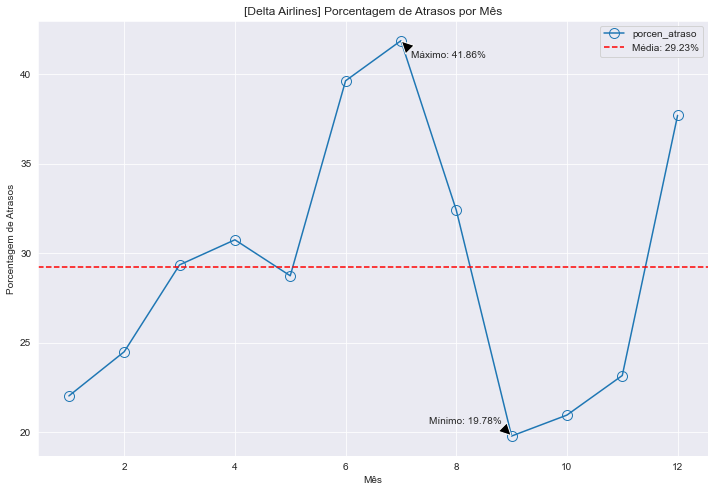

In [25]:
# Pior mês da Delta airlines

delta_meses = atrasos_porcen.query('carrier == @var_delta')
pior_mes_delta= delta_meses.\
    loc[delta_meses['porcen_atraso'].idxmax()]\
    ['month']
mes_delta_vooz = delta_meses.\
    loc[delta_meses['porcen_atraso'].idxmax()]\
    ['porcen_atraso']

print('\n')
print(f'\nO pior mês do ano para a Delta Airlines foi o mês: {pior_mes_delta}')
print(f'\nCom {mes_delta_vooz}% dos voos atrasados.')

# criando uma viz

# filtrando meses da cia delta
delta_meses_plot = atrasos_porcen.query('carrier == @var_delta') \
                .rename(columns={'month': 'mês'})

# Plotar o gráfico com marcador de ponto vazio
ax = delta_meses_plot.plot(x='mês', y='porcen_atraso', marker='o', markerfacecolor='none', markersize=10, figsize=(12, 8))

# Adicionar marcação para o valor mínimo e máximo
min_value = delta_meses_plot['porcen_atraso'].min()
max_value = delta_meses_plot['porcen_atraso'].max()

# Anotar valor mínimo com texto acima do ponto marcado
ax.annotate(f'Mínimo: {min_value:.2f}%', xy=(delta_meses_plot['mês'][delta_meses_plot['porcen_atraso'].idxmin()], min_value), 
            xytext=(-10, 10), textcoords='offset points', ha='right', va='bottom',
            arrowprops=dict(facecolor='black', shrink=0.05))

# Anotar valor máximo com texto acima do ponto marcado
ax.annotate(f'Máximo: {max_value:.2f}%', xy=(delta_meses_plot['mês'][delta_meses_plot['porcen_atraso'].idxmax()], max_value), 
            xytext=(10, -10), textcoords='offset points', ha='left', va='top',
            arrowprops=dict(facecolor='black', shrink=0.05))

# Plotar a linha da média
mean_value = delta_meses_plot['porcen_atraso'].mean()
ax.axhline(y=mean_value, color='red', linestyle='--', label=f'Média: {mean_value:.2f}%')

# Definir o título e os rótulos dos eixos
plt.title('[Delta Airlines] Porcentagem de Atrasos por Mês')
plt.xlabel('Mês')
plt.ylabel('Porcentagem de Atrasos')

# Adicionar legenda
ax.legend()

plt.show()


`3.3 - Calcule quantos aviões distintos são operados e quantos voos foram realizados para cada fabricante. Qual é a fabricante com menos voos?`

In [26]:
# Carregando dados e vendo sua disposição.

avioes = nycflights13.planes
df_avioes = pd.DataFrame(avioes)
print(avioes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tailnum       3322 non-null   object 
 1   year          3252 non-null   float64
 2   type          3322 non-null   object 
 3   manufacturer  3322 non-null   object 
 4   model         3322 non-null   object 
 5   engines       3322 non-null   int64  
 6   seats         3322 non-null   int64  
 7   speed         23 non-null     float64
 8   engine        3322 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 233.7+ KB
None


In [27]:
df_avioes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [28]:
# Join de voos com avioes

df_planes_voos = pd.merge(df_flights_limpo, df_avioes, on='tailnum', how='left')

# Verificando duplicatas
print('\n')
print(len(df_planes_voos))



327346


In [29]:
# Calculando quantos avioões distintos são operados por cada fabricante.
avioes_distintos = df_planes_voos \
                .drop_duplicates(subset='tailnum') \
                .groupby('manufacturer').size()\
                .reset_index() \
                .rename(columns={0: 'n_avioes'})

#avioes_distintos.sort_values(by='n_avioes', ascending=False).reset_index(drop=True)



Vemos a partir dessa viz (abaixo) é notavel que existe uma concentração bem grande (+80%) na quantidade de avisões distintos entre 4 fabricantes.


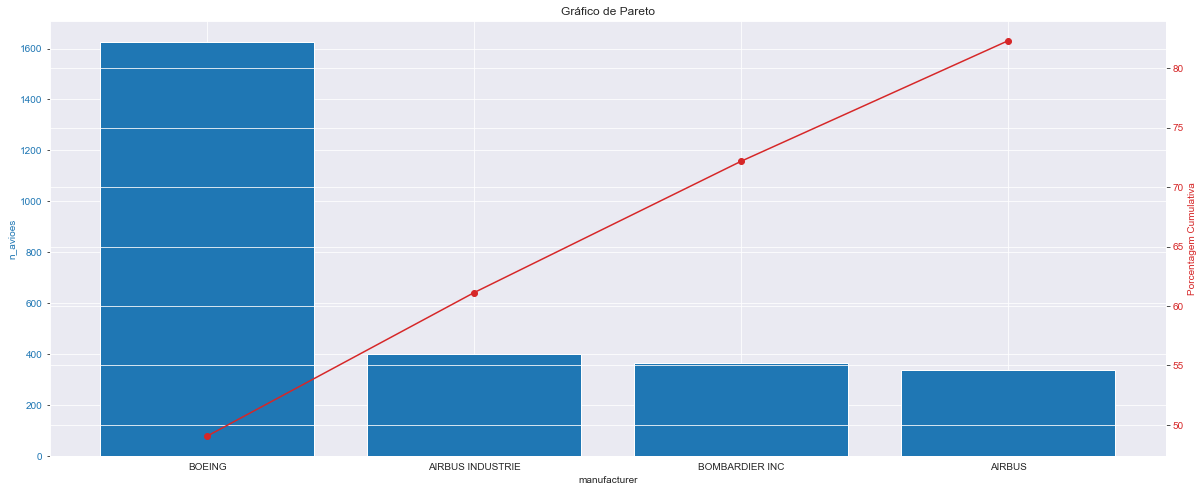

In [30]:
fig = plot_pareto(pareto(avioes_distintos, 'n_avioes'), 'manufacturer', 'n_avioes', 'cumulative_perc')
print('\n')
print('Vemos a partir dessa viz (abaixo) é notavel que existe uma concentração bem grande (+80%) na quantidade de avisões distintos entre 4 fabricantes.')

In [31]:
# Calculando quantos voos realizados por cada fabricante.

voos_realizados = df_planes_voos \
                .groupby('manufacturer').size() \
                .reset_index() \
                .rename(columns={0: 'n_voos'})
#voos_realizados.sort_values(by='n_voos', ascending=False).reset_index(drop=True)
       



Vemos a partir dessa viz (abaixo) é notavel que existe uma concentração bem grande (~70%) na quantidade de total de voos entre 3 fabricantes.


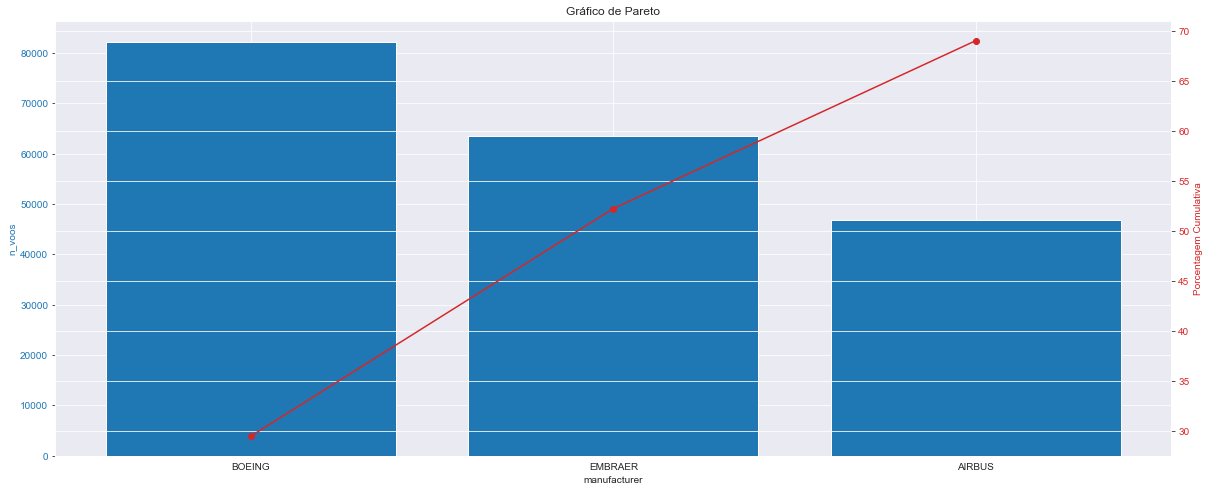

In [32]:
fig = plot_pareto(pareto(voos_realizados, 'n_voos'), 'manufacturer', 'n_voos', 'cumulative_perc')
print('\n')
print('Vemos a partir dessa viz (abaixo) é notavel que existe uma concentração bem grande (~70%) na quantidade de total de voos entre 3 fabricantes.')

In [33]:
# Encontrando fabricante com menos voos
fab_min_voos = voos_realizados.sort_values('n_voos')\
    .iloc[:1]['manufacturer'].item()

# N° de voos que ele fez
min_voos = voos_realizados.sort_values('n_voos')\
    .iloc[:1]['n_voos'].item()

print('\n')  
print(f'\nO Fabricante com menos voos foi: {fab_min_voos}')
print(f'Ele realizou: {min_voos} voos.')





O Fabricante com menos voos foi: JOHN G HESS
Ele realizou: 3 voos.


`3.4 - Qual é a empresa aérea que mais realizou voos com aviões da Airbus?`

In [34]:
# Econtrando os tailnum dos aviões Airbus
av_airbus =  df_avioes[df_avioes['manufacturer'].str.contains('AIRBUS')]

# Join dos df's para filtrar os tailnum da Airbus no df de aviões e voos
empresa_voos_airbus = pd.merge(df_planes_voos, av_airbus, on = 'tailnum', how='right')

# check_tamanho
print('\n')
print(len(empresa_voos_airbus))



87532


In [35]:
# Calculando o número de voos por empresa

voos_empresa = empresa_voos_airbus.groupby('carrier').size() \
            .reset_index() \
            .rename(columns={0: 'n_voos'})

# Pegando a empresa com maior número de voos
var_empresa_max_voos = voos_empresa.sort_values('n_voos',ascending=False)\
    .iloc[:1]['carrier'].item()

# Extraindo nome da empresa do df das linhas areas
empresa_max_voos = df_airlines.query('carrier == @var_empresa_max_voos') \
                .iloc[:1]['name'].item()
                
max_voos = empresa_voos_airbus.groupby('carrier').size() .reset_index() \
                .rename(columns={0: 'n_voos'})\
                .sort_values('n_voos',ascending=False)\
                .iloc[:1]['n_voos'].item()

print('\n')  
print(f'\nA empresa que mais realizou voos com aviões da Airbus foi a: {empresa_max_voos}')
print(f'Realizou: {max_voos} voos')




A empresa que mais realizou voos com aviões da Airbus foi a: JetBlue Airways
Realizou: 33772 voos




Vemos a partir dessa viz (abaixo) é notavel que existe uma concentração bem grande (~75%) na quantidade de total de voos entre 3 empresas.


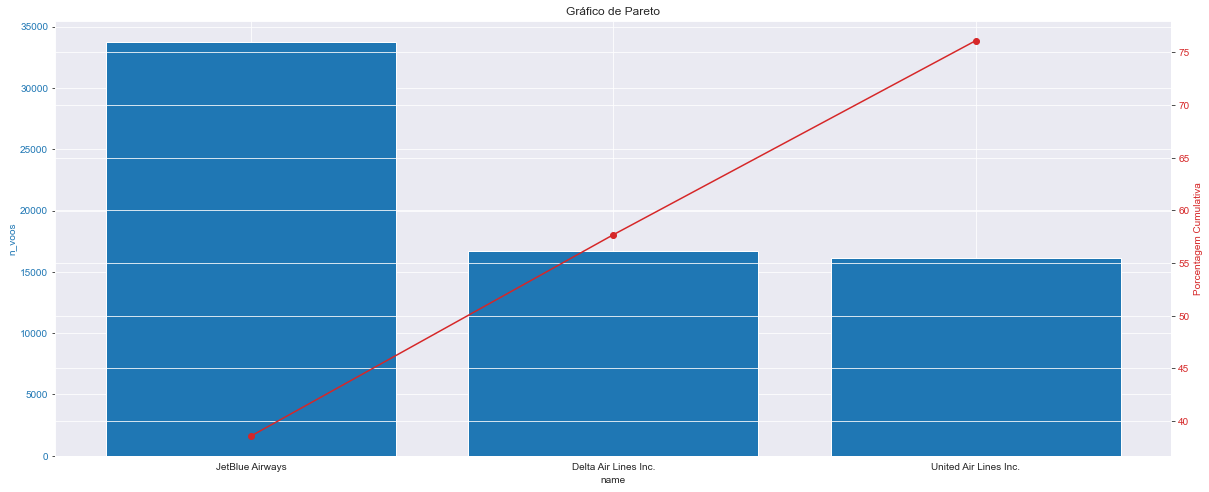

In [36]:
nome_empresas_voos = pd.merge(voos_empresa, df_airlines, on='carrier', how = 'left')
fig = plot_pareto(pareto(nome_empresas_voos, 'n_voos'), 'name', 'n_voos', 'cumulative_perc')
print('\n')
print('Vemos a partir dessa viz (abaixo) é notavel que existe uma concentração bem grande (~75%) na quantidade de total de voos entre 3 empresas.')

`3.5 - Compute quantos voos cada aeroporto da cidade recebeu entre 18h e 22h do dia 3 de março.`

In [37]:
# Carregando dados e vendo sua disposição.

aeroportos = nycflights13.airports
df_aeroportos  = pd.DataFrame(aeroportos)
print(df_aeroportos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   faa     1458 non-null   object 
 1   name    1458 non-null   object 
 2   lat     1458 non-null   float64
 3   lon     1458 non-null   float64
 4   alt     1458 non-null   int64  
 5   tz      1458 non-null   int64  
 6   dst     1458 non-null   object 
 7   tzone   1455 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 91.2+ KB
None


In [38]:
df_aeroportos.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


#### Antes de mais nada, não sei se foi intencional, mas visualizei que nessa tabela temos apenas voos que saem dos aeroportos de Nova York.
#### *Portanto, é raro haver voos para dentro da mesma cidade.*

obs: Antes dessa abordagem que verá abaixo, estava tentando filtrar através da tabela de aeroportos por latitude e longitude os limites da cidade. Vou deixar a função em resources.


In [39]:
# Pegando os 3 aeroportos mais famosos de NY para provar o que disse acima
jfk= len(df_flights.query('dest =="JFK"'))
ewr = len(df_flights.query('dest =="EWR"'))
lga = len(df_flights.query('dest =="LGA"'))

print(jfk, ewr, lga) # isso sem filtro algum

0 0 1


In [40]:
# Outra maneira de reforçar o que foi dito acima
faa_nyc = df_flights['origin'].unique().tolist() # QED -> Quad erat demonstratum
faa_nyc

['EWR', 'LGA', 'JFK']

`Para continuar o case vamos supor que a o invez de receber voos, vamos ver quantos voos sairam de cada aeroporto.`

In [41]:
# Filtrando agora voos da tabela flights limpa para mantermos a analise sobre uma mesma fonte.
filtro_voos = df_flights_limpo.query('year == 2013 and month ==3') \
                        .query('hour >= 18 and hour <= 22') \
                        .reset_index(drop=True)

# Total de voos por aeroporto.
aero_voos = filtro_voos.groupby('origin').size().reset_index() \
            .rename(columns={0: 'n_voos'})\
            .sort_values('n_voos',ascending=False)\

# Pegando nome do aeroporto e latitude e longitude.
nome_aero = df_aeroportos.query('faa in @faa_nyc')[['faa', 'name', 'lat', 'lon']].reset_index(drop=True)

# Join
voos_saida_nyc_filtrados = pd.merge(aero_voos, nome_aero, left_on='origin', right_on='faa') \
                            [['name', 'n_voos','lat' ,'lon']]
voos_saida_nyc_filtrados[['name', 'n_voos']]

,name,n_voos
0,John F Kennedy Intl,2456
1,Newark Liberty Intl,2155
2,La Guardia,1641


In [42]:
# Plotando o mapa de NYC com a biblioteca folium

# Define o centro do mapa
centro_nyc = [40.7128, -74.0060]

# Criando o objeto mapa
map_nyc = folium.Map(location=centro_nyc, zoom_start=11)

#  Interando por cada linha do df para extrair os valores para
for index, row in voos_saida_nyc_filtrados.iterrows():
    folium.Marker(location=[row['lat'], row['lon']], 
                  popup=row['name'] + " - " + str(row['n_voos']) + " voos", 
                  icon=folium.Icon(color='blue', icon='plane')).add_to(map_nyc)
# Plotando mapa
map_nyc


Mapa 01

`Agora vamos ver os destinos destes voos, ainda destacando a origem.`

In [43]:
# Filtrando agora voos da tabela flights limpa para mantermos a análise sobre uma mesma fonte.
filtro_voos = df_flights_limpo.query('year == 2013 and month ==3') \
                        .query('hour >= 18 and hour <= 22') \
                        .reset_index(drop=True)

# Total de voos por origem e destino.
orig_dest_voos = filtro_voos.groupby(['origin', 'dest']).size().reset_index() \
                  .rename(columns={0: 'n_voos'}) \
                  .sort_values('n_voos', ascending=False)

# Pegando nome do aeroporto e latitude e longitude da origem.
nome_aero_origem = df_aeroportos[['faa', 'name']] \
                      .rename(columns={'name': 'name_origem'})

# Merge com nome do aeroporto da origem.
voos_saida_nyc_filtrados = pd.merge(orig_dest_voos, nome_aero_origem, left_on='origin', right_on='faa') \
                            [['name_origem', 'dest', 'n_voos']]

# Pegando nome do aeroporto, latitude e longitude do destino.
nome_aero_dest = df_aeroportos[['faa', 'name', 'lat', 'lon']] \
                    .rename(columns={'name': 'name_dest'})

# Merge com nome do aeroporto e latitude e longitude do destino.
voos_saida_nyc_filtrados = pd.merge(voos_saida_nyc_filtrados, nome_aero_dest, left_on='dest', right_on='faa') \
                            [['name_origem', 'name_dest', 'n_voos', 'lat', 'lon']]

In [44]:
# Define as coordenadas do centro do mapa
eua_coordinate = [40.7128, -94.0060]

# Cria um objeto de mapa
site_map = folium.Map(location=eua_coordinate, zoom_start=4)

# Define um dicionário para mapear cada nome de origem para uma cor
cores = {}
for i, name in enumerate(voos_saida_nyc_filtrados['name_origem'].unique()):
    if i == 0:
        cores[name] = 'blue'
    elif i == 1:
        cores[name] = 'green'
    else:
        cores[name] = 'orange'

# Adiciona um círculo para cada aeroporto com raio baseado no número de voos
for index, row in voos_saida_nyc_filtrados.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=row['n_voos']/10,
        tooltip=f"{row['name_dest']}: {row['n_voos']} voos",
        fill=True,
        fill_opacity=0.7,
        color=cores[row['name_origem']],
        fill_color=cores[row['name_origem']],
        popup=f"{row['name_origem']}: {row['n_voos']} voos"
    ).add_to(site_map)

# Adiciona a legenda de cores no canto superior direito
legend_html = '<div style="position: fixed; top: 10px; right: 10px; border: 2px solid grey; background-color: white; padding: 5px; font-size: 14px; z-index:9999;">'
legend_html += '<p style="margin-top: 0px; margin-bottom: 5px;">Legenda:</p>'
for name, color in cores.items():
    legend_html += f'<div style="display: flex; align-items: center;"><div style="width: 15px; height: 15px; background-color: {color};"></div><p style="margin-left: 5px; margin-bottom: 0px;">{name}</p></div>'
legend_html += '</div>'
site_map.get_root().html.add_child(folium.Element(legend_html))

# Adiciona um controle de camadas (layers)
folium.LayerControl().add_to(site_map)

# Mostra o mapa
site_map


Mapa 02

`3.6 - [Possíveis próximos passos] Como é de praxe em análises, vou deixar alguma lista de perguntas que acho que seriam legais para complementar a análise.`

*Mesa fonte de dados*

* Olhar dentro das grandes empresas (alta representatividade) aéreas para verificar se existe alguma sazonalidade no número de voos.
* Procurar por dominância de uma empresa/tipo de avião para destino específico.
* Investigar se existe relação entre os atrasos e o clima.

*Buscando outras fontes para complementar*

* Buscar o número de passagens vendidas por voo para tentar chegar ao valor médio de faturamento por voo.
* Verificar se existe uma diferença muito grande dessa média entre modelos diferentes de aviões. O foco aqui é entender se existe uma segmentação financeira por tipo de avião para entender o público-alvo de cada empresa.
* Calcular o preço médio por km para cada empresa. Assim, vendo pelos destinos dos voos e complementando com o primeiro item, é possível tentar chegar em uma aproximação de quais empresas tiveram o maior faturamento neste ano (2013).